### 차원이 많아져서 overfitting 문제 => dropout 활성화

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm_notebook
import sklearn.preprocessing
import gc

In [2]:
# dataframe display 옵션
pd.set_option('display.max_columns' , 30)
pd.set_option('display.width', None)

In [3]:
data = pd.read_csv('./data/final5/final5_other_Data.csv', dtype={                  
					'matchType' : 'int8',
                    'winPlacePerc'  :  'float32',
					'assists_mean'  :  'float32',
					'boosts_mean'  :  'float32',
					'DBNOs_mean'  :  'float32',
					'headshotKills_mean'  :  'float32',
					'heals_mean'  :  'float32',
					'kills_mean'  :  'float32',
					'killStreaks_mean'  :  'float32',
					'longestKill_mean'  :  'float32',
					'revives_mean'  :  'float32',
					'rideDistance_mean'  :  'float32',
					'swimDistance_mean'  :  'float32',
					'walkDistance_mean'  :  'float32',
					'weaponsAcquired_mean'  :  'float32',
					'assists_min'  :  'int16',
					'boosts_min'  :  'int16',
					'DBNOs_min'  :  'int16',
					'headshotKills_min'  :  'int16',
					'heals_min'  :  'int16',
					'kills_min'  :  'int16',
					'killStreaks_min'  :  'int16',
					'longestKill_min'  :  'float32',
					'revives_min'  :  'int16',
					'rideDistance_min'  :  'float32',
					'swimDistance_min'  :  'float32',
					'walkDistance_min'  :  'float32',
					'weaponsAcquired_min'  :  'int16',
					'assists_max'  :  'int16',
					'boosts_max'  :  'int16',
					'DBNOs_max'  :  'int16',
					'headshotKills_max'  :  'int16',
					'heals_max'  :  'int16',
					'kills_max'  :  'int16',
					'killStreaks_max'  :  'int16',
					'longestKill_max'  :  'float32',
					'revives_max'  :  'int16',
					'rideDistance_max'  :  'float32',
					'swimDistance_max'  :  'float32',
					'walkDistance_max'  :  'float32',
					'weaponsAcquired_max'  :  'int16',
					'assists_match_mean'  :  'float32',
					'boosts_match_mean'  :  'float32',
					'DBNOs_match_mean'  :  'float32',
					'headshotKills_match_mean'  :  'float32',
					'heals_match_mean'  :  'float32',
					'kills_match_mean'  :  'float32',
					'killStreaks_match_mean'  :  'float32',
					'longestKill_match_mean'  :  'float32',
					'revives_match_mean'  :  'float32',
					'rideDistance_match_mean'  :  'float32',
					'swimDistance_match_mean'  :  'float32',
					'walkDistance_match_mean'  :  'float32',
					'weaponsAcquired_match_mean'  :  'float32',
					'match_size'  :  'int16'
                })
train_df, test_df = train_test_split(data, train_size = 0.7)

In [4]:
# null값 확인 및 
# inplace=False로 하면 기존 혹은 새로운 변수에 할당해야 하고, inplace = True 하면 해당변수에 적용됨
# na가 포함된 행을 제거하는 것은 데이터 소실이 크기 때문에 inplace=False가 default
train_df.dropna(inplace = True)
print(train_df.isnull().any().any())
test_df.dropna(inplace = True)
print(test_df.isnull().any().any())

False
False


In [5]:
del data
gc.collect()

0

In [6]:
other_train_df = train_df.copy()
other_test_df = test_df.copy()

In [7]:
other_train_df.columns

Index(['Id', 'groupId', 'matchId', 'matchType', 'assists_mean', 'boosts_mean',
       'DBNOs_mean', 'headshotKills_mean', 'heals_mean', 'kills_mean',
       'killStreaks_mean', 'revives_mean', 'weaponsAcquired_mean',
       'assists_min', 'boosts_min', 'DBNOs_min', 'headshotKills_min',
       'heals_min', 'kills_min', 'killStreaks_min', 'revives_min',
       'weaponsAcquired_min', 'assists_max', 'boosts_max', 'DBNOs_max',
       'headshotKills_max', 'heals_max', 'kills_max', 'killStreaks_max',
       'revives_max', 'weaponsAcquired_max', 'longestKill_mean_log',
       'rideDistance_mean_log', 'swimDistance_mean_log',
       'walkDistance_mean_log', 'longestKill_min_log', 'rideDistance_min_log',
       'swimDistance_min_log', 'walkDistance_min_log', 'longestKill_max_log',
       'rideDistance_max_log', 'swimDistance_max_log', 'walkDistance_max_log',
       'match_size', 'headshotKillrate_mean', 'assists_ratio', 'boosts_ratio',
       'headshotKills_ratio', 'heals_ratio', 'kills_ratio',


In [8]:
del_list = ['groupId','matchId','matchType']
for col in del_list:
    del other_train_df[col] # 한 번만 실행
    del other_test_df[col] # 한 번만 실행

In [10]:
total_ncol = len(other_train_df.columns)

train_np = np.array(other_train_df)
test_np = np.array(other_test_df)

# 데이터 전 처리. 표준졍규화 값으로 스케일링.
scaler = sklearn.preprocessing.scale

x_train = scaler(train_np[:,1:-1]) # fit : 표준화하기 위한 평균과 분산을 구하기 위함
y_train = train_np[:,[-1]]
print('pass')

x_test = scaler(test_np[:,1:-1]) # id, groupId, matchid 제외
y_test = test_np[:,[-1]]
print('pass')

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, total_ncol-2]) # id, winplaceperc 제외
Y = tf.placeholder(tf.float32, shape=[None, 1])
dropout_rate = tf.placeholder(tf.float32)

# initilizing Weights - xavier_initializer()
initializer = tf.contrib.layers.xavier_initializer()

W1 = tf.Variable(initializer([total_ncol-2, 55]))
b1 = tf.Variable(initializer([55]))
_layer1 = tf.nn.leaky_relu(tf.matmul(X, W1) + b1)
layer1 = tf.nn.dropout(_layer1,dropout_rate)
# drop out - overfitting 문제 방지, 랜덤하게 뉴런을 kill해버림

# W1 = tf.Variable(tf.random_normal([total_ncol-2, 10]), name='weight1')
# b1 = tf.Variable(tf.random_normal([10]), name='bias1')
# layer1 = tf.nn.leaky_relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(initializer([55, 55]))
b2 = tf.Variable(initializer([55]))
_layer2 = tf.nn.leaky_relu(tf.matmul(layer1, W2) + b2)
layer2 = tf.nn.dropout(_layer2,dropout_rate)

W3 = tf.Variable(initializer([55, 55]))
b3 = tf.Variable(initializer([55]))
_layer3 = tf.nn.leaky_relu(tf.matmul(layer2, W3) + b3)
layer3 = tf.nn.dropout(_layer3,dropout_rate)

W4 = tf.Variable(initializer([55, 1]))
b4 = tf.Variable(initializer([1]))
_hypothesis = tf.nn.leaky_relu(tf.matmul(layer3, W4) + b4) # 마지막은 sigmoid? 0~1사이값
hypothesis = tf.nn.dropout(_hypothesis,dropout_rate)

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y)) 
train = tf.train.AdamOptimizer(learning_rate=0.002).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())
    batch_size = 2000
    total_batch = int(len(x_train)/batch_size)
    
    for epoch in tqdm_notebook(range(3000)):
        total_cost = 0
        
        for step, offset in enumerate(range(0, len(x_train)+1, batch_size)):
                x_batch, y_batch = x_train[offset: offset + batch_size], y_train[offset: offset + batch_size]  
                cost_val, hy_val, _ = sess.run(
                    [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch, dropout_rate:1})
                total_cost += cost_val
            
        print('Epoch: ', '%04d' % (epoch+1), 'Avg.cost = ', '{:.5f}'.format(total_cost/total_batch))
#             if step % 1000 == 0:
#                 print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
#     Weight = sess.run(W)
#     print("W\t" , Weight)
    y_predict = sess.run(hypothesis, feed_dict={X:x_test,dropout_rate:1})
    print("Predict\t", y_predict)

pass
pass


Epoch:  0001 Avg.cost =  0.31970
Epoch:  0002 Avg.cost =  0.09404
Epoch:  0003 Avg.cost =  0.06370
Epoch:  0004 Avg.cost =  0.05324
Epoch:  0005 Avg.cost =  0.04784
Epoch:  0006 Avg.cost =  0.04426
Epoch:  0007 Avg.cost =  0.04158
Epoch:  0008 Avg.cost =  0.03942
Epoch:  0009 Avg.cost =  0.03772
Epoch:  0010 Avg.cost =  0.03631
Epoch:  0011 Avg.cost =  0.03517
Epoch:  0012 Avg.cost =  0.03417
Epoch:  0013 Avg.cost =  0.03333
Epoch:  0014 Avg.cost =  0.03259
Epoch:  0015 Avg.cost =  0.03195
Epoch:  0016 Avg.cost =  0.03138
Epoch:  0017 Avg.cost =  0.03087
Epoch:  0018 Avg.cost =  0.03038
Epoch:  0019 Avg.cost =  0.02995
Epoch:  0020 Avg.cost =  0.02955
Epoch:  0021 Avg.cost =  0.02919
Epoch:  0022 Avg.cost =  0.02885
Epoch:  0023 Avg.cost =  0.02853
Epoch:  0024 Avg.cost =  0.02822
Epoch:  0025 Avg.cost =  0.02793
Epoch:  0026 Avg.cost =  0.02766
Epoch:  0027 Avg.cost =  0.02740
Epoch:  0028 Avg.cost =  0.02716
Epoch:  0029 Avg.cost =  0.02693
Epoch:  0030 Avg.cost =  0.02671
Epoch:  00

Epoch:  0249 Avg.cost =  0.00918
Epoch:  0250 Avg.cost =  0.00916
Epoch:  0251 Avg.cost =  0.00923
Epoch:  0252 Avg.cost =  0.00921
Epoch:  0253 Avg.cost =  0.00931
Epoch:  0254 Avg.cost =  0.00923
Epoch:  0255 Avg.cost =  0.00934
Epoch:  0256 Avg.cost =  0.00924
Epoch:  0257 Avg.cost =  0.00932
Epoch:  0258 Avg.cost =  0.00924
Epoch:  0259 Avg.cost =  0.00934
Epoch:  0260 Avg.cost =  0.00938
Epoch:  0261 Avg.cost =  0.00953
Epoch:  0262 Avg.cost =  0.00974
Epoch:  0263 Avg.cost =  0.01011
Epoch:  0264 Avg.cost =  0.01071
Epoch:  0265 Avg.cost =  0.01175
Epoch:  0266 Avg.cost =  0.01163
Epoch:  0267 Avg.cost =  0.01035
Epoch:  0268 Avg.cost =  0.00959
Epoch:  0269 Avg.cost =  0.00919
Epoch:  0270 Avg.cost =  0.00883
Epoch:  0271 Avg.cost =  0.00886
Epoch:  0272 Avg.cost =  0.00885
Epoch:  0273 Avg.cost =  0.00874
Epoch:  0274 Avg.cost =  0.00874
Epoch:  0275 Avg.cost =  0.00856
Epoch:  0276 Avg.cost =  0.00852
Epoch:  0277 Avg.cost =  0.00850
Epoch:  0278 Avg.cost =  0.00851
Epoch:  02

Epoch:  0497 Avg.cost =  0.00603
Epoch:  0498 Avg.cost =  0.00600
Epoch:  0499 Avg.cost =  0.00599
Epoch:  0500 Avg.cost =  0.00598
Epoch:  0501 Avg.cost =  0.00595
Epoch:  0502 Avg.cost =  0.00593
Epoch:  0503 Avg.cost =  0.00592
Epoch:  0504 Avg.cost =  0.00589
Epoch:  0505 Avg.cost =  0.00586
Epoch:  0506 Avg.cost =  0.00583
Epoch:  0507 Avg.cost =  0.00580
Epoch:  0508 Avg.cost =  0.00577
Epoch:  0509 Avg.cost =  0.00576
Epoch:  0510 Avg.cost =  0.00573
Epoch:  0511 Avg.cost =  0.00571
Epoch:  0512 Avg.cost =  0.00568
Epoch:  0513 Avg.cost =  0.00567
Epoch:  0514 Avg.cost =  0.00566
Epoch:  0515 Avg.cost =  0.00563
Epoch:  0516 Avg.cost =  0.00563
Epoch:  0517 Avg.cost =  0.00561
Epoch:  0518 Avg.cost =  0.00559
Epoch:  0519 Avg.cost =  0.00559
Epoch:  0520 Avg.cost =  0.00556
Epoch:  0521 Avg.cost =  0.00555
Epoch:  0522 Avg.cost =  0.00555
Epoch:  0523 Avg.cost =  0.00555
Epoch:  0524 Avg.cost =  0.00555
Epoch:  0525 Avg.cost =  0.00554
Epoch:  0526 Avg.cost =  0.00555
Epoch:  05

Epoch:  0745 Avg.cost =  0.00581
Epoch:  0746 Avg.cost =  0.00540
Epoch:  0747 Avg.cost =  0.00522
Epoch:  0748 Avg.cost =  0.00510
Epoch:  0749 Avg.cost =  0.00511
Epoch:  0750 Avg.cost =  0.00495
Epoch:  0751 Avg.cost =  0.00506
Epoch:  0752 Avg.cost =  0.00494
Epoch:  0753 Avg.cost =  0.00490
Epoch:  0754 Avg.cost =  0.00482
Epoch:  0755 Avg.cost =  0.00486
Epoch:  0756 Avg.cost =  0.00478
Epoch:  0757 Avg.cost =  0.00478
Epoch:  0758 Avg.cost =  0.00475
Epoch:  0759 Avg.cost =  0.00480
Epoch:  0760 Avg.cost =  0.00478
Epoch:  0761 Avg.cost =  0.00474
Epoch:  0762 Avg.cost =  0.00480
Epoch:  0763 Avg.cost =  0.00475
Epoch:  0764 Avg.cost =  0.00471
Epoch:  0765 Avg.cost =  0.00473
Epoch:  0766 Avg.cost =  0.00469
Epoch:  0767 Avg.cost =  0.00465
Epoch:  0768 Avg.cost =  0.00462
Epoch:  0769 Avg.cost =  0.00462
Epoch:  0770 Avg.cost =  0.00462
Epoch:  0771 Avg.cost =  0.00463
Epoch:  0772 Avg.cost =  0.00462
Epoch:  0773 Avg.cost =  0.00463
Epoch:  0774 Avg.cost =  0.00460
Epoch:  07

Epoch:  0993 Avg.cost =  0.00458
Epoch:  0994 Avg.cost =  0.00504
Epoch:  0995 Avg.cost =  0.00496
Epoch:  0996 Avg.cost =  0.00587
Epoch:  0997 Avg.cost =  0.00528
Epoch:  0998 Avg.cost =  0.00474
Epoch:  0999 Avg.cost =  0.00516
Epoch:  1000 Avg.cost =  0.00494
Epoch:  1001 Avg.cost =  0.00534
Epoch:  1002 Avg.cost =  0.00614
Epoch:  1003 Avg.cost =  0.00838
Epoch:  1004 Avg.cost =  0.01415
Epoch:  1005 Avg.cost =  0.01084
Epoch:  1006 Avg.cost =  0.00728
Epoch:  1007 Avg.cost =  0.00596
Epoch:  1008 Avg.cost =  0.00506
Epoch:  1009 Avg.cost =  0.00473
Epoch:  1010 Avg.cost =  0.00466
Epoch:  1011 Avg.cost =  0.00447
Epoch:  1012 Avg.cost =  0.00436
Epoch:  1013 Avg.cost =  0.00426
Epoch:  1014 Avg.cost =  0.00415
Epoch:  1015 Avg.cost =  0.00410
Epoch:  1016 Avg.cost =  0.00405
Epoch:  1017 Avg.cost =  0.00401
Epoch:  1018 Avg.cost =  0.00393
Epoch:  1019 Avg.cost =  0.00388
Epoch:  1020 Avg.cost =  0.00384
Epoch:  1021 Avg.cost =  0.00383
Epoch:  1022 Avg.cost =  0.00382
Epoch:  10

Epoch:  1241 Avg.cost =  0.00416
Epoch:  1242 Avg.cost =  0.00438
Epoch:  1243 Avg.cost =  0.00430
Epoch:  1244 Avg.cost =  0.00422
Epoch:  1245 Avg.cost =  0.00433
Epoch:  1246 Avg.cost =  0.00434
Epoch:  1247 Avg.cost =  0.00430
Epoch:  1248 Avg.cost =  0.00446
Epoch:  1249 Avg.cost =  0.00465
Epoch:  1250 Avg.cost =  0.00444
Epoch:  1251 Avg.cost =  0.00435
Epoch:  1252 Avg.cost =  0.00436
Epoch:  1253 Avg.cost =  0.00429
Epoch:  1254 Avg.cost =  0.00437
Epoch:  1255 Avg.cost =  0.00456
Epoch:  1256 Avg.cost =  0.00429
Epoch:  1257 Avg.cost =  0.00430
Epoch:  1258 Avg.cost =  0.00423
Epoch:  1259 Avg.cost =  0.00412
Epoch:  1260 Avg.cost =  0.00419
Epoch:  1261 Avg.cost =  0.00427
Epoch:  1262 Avg.cost =  0.00402
Epoch:  1263 Avg.cost =  0.00399
Epoch:  1264 Avg.cost =  0.00397
Epoch:  1265 Avg.cost =  0.00392
Epoch:  1266 Avg.cost =  0.00396
Epoch:  1267 Avg.cost =  0.00409
Epoch:  1268 Avg.cost =  0.00420
Epoch:  1269 Avg.cost =  0.00407
Epoch:  1270 Avg.cost =  0.00405
Epoch:  12

Epoch:  1489 Avg.cost =  0.00437
Epoch:  1490 Avg.cost =  0.00450
Epoch:  1491 Avg.cost =  0.00439
Epoch:  1492 Avg.cost =  0.00468
Epoch:  1493 Avg.cost =  0.00477
Epoch:  1494 Avg.cost =  0.00457
Epoch:  1495 Avg.cost =  0.00476
Epoch:  1496 Avg.cost =  0.00461
Epoch:  1497 Avg.cost =  0.00461
Epoch:  1498 Avg.cost =  0.00430
Epoch:  1499 Avg.cost =  0.00412
Epoch:  1500 Avg.cost =  0.00406
Epoch:  1501 Avg.cost =  0.00386
Epoch:  1502 Avg.cost =  0.00385
Epoch:  1503 Avg.cost =  0.00371
Epoch:  1504 Avg.cost =  0.00374
Epoch:  1505 Avg.cost =  0.00362
Epoch:  1506 Avg.cost =  0.00359
Epoch:  1507 Avg.cost =  0.00360
Epoch:  1508 Avg.cost =  0.00351
Epoch:  1509 Avg.cost =  0.00357
Epoch:  1510 Avg.cost =  0.00369
Epoch:  1511 Avg.cost =  0.00360
Epoch:  1512 Avg.cost =  0.00355
Epoch:  1513 Avg.cost =  0.00361
Epoch:  1514 Avg.cost =  0.00363
Epoch:  1515 Avg.cost =  0.00361
Epoch:  1516 Avg.cost =  0.00367
Epoch:  1517 Avg.cost =  0.00378
Epoch:  1518 Avg.cost =  0.00400
Epoch:  15

Epoch:  1737 Avg.cost =  0.00383
Epoch:  1738 Avg.cost =  0.00380
Epoch:  1739 Avg.cost =  0.00374
Epoch:  1740 Avg.cost =  0.00390
Epoch:  1741 Avg.cost =  0.00405
Epoch:  1742 Avg.cost =  0.00389
Epoch:  1743 Avg.cost =  0.00396
Epoch:  1744 Avg.cost =  0.00398
Epoch:  1745 Avg.cost =  0.00382
Epoch:  1746 Avg.cost =  0.00394
Epoch:  1747 Avg.cost =  0.00403
Epoch:  1748 Avg.cost =  0.00391
Epoch:  1749 Avg.cost =  0.00404
Epoch:  1750 Avg.cost =  0.00389
Epoch:  1751 Avg.cost =  0.00391
Epoch:  1752 Avg.cost =  0.00408
Epoch:  1753 Avg.cost =  0.00378
Epoch:  1754 Avg.cost =  0.00389
Epoch:  1755 Avg.cost =  0.00373
Epoch:  1756 Avg.cost =  0.00376
Epoch:  1757 Avg.cost =  0.00382
Epoch:  1758 Avg.cost =  0.00362
Epoch:  1759 Avg.cost =  0.00378
Epoch:  1760 Avg.cost =  0.00368
Epoch:  1761 Avg.cost =  0.00362
Epoch:  1762 Avg.cost =  0.00376
Epoch:  1763 Avg.cost =  0.00358
Epoch:  1764 Avg.cost =  0.00363
Epoch:  1765 Avg.cost =  0.00360
Epoch:  1766 Avg.cost =  0.00352
Epoch:  17

Epoch:  1985 Avg.cost =  0.00303
Epoch:  1986 Avg.cost =  0.00307
Epoch:  1987 Avg.cost =  0.00352
Epoch:  1988 Avg.cost =  0.00613
Epoch:  1989 Avg.cost =  0.00722
Epoch:  1990 Avg.cost =  0.00412
Epoch:  1991 Avg.cost =  0.00376
Epoch:  1992 Avg.cost =  0.00355
Epoch:  1993 Avg.cost =  0.00335
Epoch:  1994 Avg.cost =  0.00307
Epoch:  1995 Avg.cost =  0.00294
Epoch:  1996 Avg.cost =  0.00285
Epoch:  1997 Avg.cost =  0.00276
Epoch:  1998 Avg.cost =  0.00275
Epoch:  1999 Avg.cost =  0.00272
Epoch:  2000 Avg.cost =  0.00269
Epoch:  2001 Avg.cost =  0.00267
Epoch:  2002 Avg.cost =  0.00266
Epoch:  2003 Avg.cost =  0.00263
Epoch:  2004 Avg.cost =  0.00266
Epoch:  2005 Avg.cost =  0.00267
Epoch:  2006 Avg.cost =  0.00265
Epoch:  2007 Avg.cost =  0.00270
Epoch:  2008 Avg.cost =  0.00273
Epoch:  2009 Avg.cost =  0.00271
Epoch:  2010 Avg.cost =  0.00283
Epoch:  2011 Avg.cost =  0.00281
Epoch:  2012 Avg.cost =  0.00297
Epoch:  2013 Avg.cost =  0.00333
Epoch:  2014 Avg.cost =  0.00393
Epoch:  20

Epoch:  2233 Avg.cost =  0.00307
Epoch:  2234 Avg.cost =  0.00315
Epoch:  2235 Avg.cost =  0.00323
Epoch:  2236 Avg.cost =  0.00330
Epoch:  2237 Avg.cost =  0.00346
Epoch:  2238 Avg.cost =  0.00390
Epoch:  2239 Avg.cost =  0.00429
Epoch:  2240 Avg.cost =  0.00449
Epoch:  2241 Avg.cost =  0.00464
Epoch:  2242 Avg.cost =  0.00475
Epoch:  2243 Avg.cost =  0.00418
Epoch:  2244 Avg.cost =  0.00445
Epoch:  2245 Avg.cost =  0.00406
Epoch:  2246 Avg.cost =  0.00397
Epoch:  2247 Avg.cost =  0.00359
Epoch:  2248 Avg.cost =  0.00365
Epoch:  2249 Avg.cost =  0.00342
Epoch:  2250 Avg.cost =  0.00320
Epoch:  2251 Avg.cost =  0.00299
Epoch:  2252 Avg.cost =  0.00309
Epoch:  2253 Avg.cost =  0.00301
Epoch:  2254 Avg.cost =  0.00295
Epoch:  2255 Avg.cost =  0.00294
Epoch:  2256 Avg.cost =  0.00282
Epoch:  2257 Avg.cost =  0.00286
Epoch:  2258 Avg.cost =  0.00283
Epoch:  2259 Avg.cost =  0.00287
Epoch:  2260 Avg.cost =  0.00288
Epoch:  2261 Avg.cost =  0.00290
Epoch:  2262 Avg.cost =  0.00288
Epoch:  22

Epoch:  2481 Avg.cost =  0.00253
Epoch:  2482 Avg.cost =  0.00250
Epoch:  2483 Avg.cost =  0.00253
Epoch:  2484 Avg.cost =  0.00252
Epoch:  2485 Avg.cost =  0.00256
Epoch:  2486 Avg.cost =  0.00252
Epoch:  2487 Avg.cost =  0.00252
Epoch:  2488 Avg.cost =  0.00257
Epoch:  2489 Avg.cost =  0.00252
Epoch:  2490 Avg.cost =  0.00251
Epoch:  2491 Avg.cost =  0.00252
Epoch:  2492 Avg.cost =  0.00249
Epoch:  2493 Avg.cost =  0.00249
Epoch:  2494 Avg.cost =  0.00249
Epoch:  2495 Avg.cost =  0.00250
Epoch:  2496 Avg.cost =  0.00245
Epoch:  2497 Avg.cost =  0.00252
Epoch:  2498 Avg.cost =  0.00245
Epoch:  2499 Avg.cost =  0.00253
Epoch:  2500 Avg.cost =  0.00248
Epoch:  2501 Avg.cost =  0.00254
Epoch:  2502 Avg.cost =  0.00245
Epoch:  2503 Avg.cost =  0.00242
Epoch:  2504 Avg.cost =  0.00242
Epoch:  2505 Avg.cost =  0.00249
Epoch:  2506 Avg.cost =  0.00245
Epoch:  2507 Avg.cost =  0.00247
Epoch:  2508 Avg.cost =  0.00249
Epoch:  2509 Avg.cost =  0.00252
Epoch:  2510 Avg.cost =  0.00252
Epoch:  25

Epoch:  2729 Avg.cost =  0.00333
Epoch:  2730 Avg.cost =  0.00309
Epoch:  2731 Avg.cost =  0.00322
Epoch:  2732 Avg.cost =  0.00323
Epoch:  2733 Avg.cost =  0.00315
Epoch:  2734 Avg.cost =  0.00318
Epoch:  2735 Avg.cost =  0.00312
Epoch:  2736 Avg.cost =  0.00314
Epoch:  2737 Avg.cost =  0.00331
Epoch:  2738 Avg.cost =  0.00329
Epoch:  2739 Avg.cost =  0.00316
Epoch:  2740 Avg.cost =  0.00319
Epoch:  2741 Avg.cost =  0.00307
Epoch:  2742 Avg.cost =  0.00322
Epoch:  2743 Avg.cost =  0.00325
Epoch:  2744 Avg.cost =  0.00319
Epoch:  2745 Avg.cost =  0.00322
Epoch:  2746 Avg.cost =  0.00309
Epoch:  2747 Avg.cost =  0.00302
Epoch:  2748 Avg.cost =  0.00314
Epoch:  2749 Avg.cost =  0.00312
Epoch:  2750 Avg.cost =  0.00301
Epoch:  2751 Avg.cost =  0.00308
Epoch:  2752 Avg.cost =  0.00301
Epoch:  2753 Avg.cost =  0.00299
Epoch:  2754 Avg.cost =  0.00305
Epoch:  2755 Avg.cost =  0.00303
Epoch:  2756 Avg.cost =  0.00294
Epoch:  2757 Avg.cost =  0.00297
Epoch:  2758 Avg.cost =  0.00297
Epoch:  27

Epoch:  2977 Avg.cost =  0.00306
Epoch:  2978 Avg.cost =  0.00311
Epoch:  2979 Avg.cost =  0.00329
Epoch:  2980 Avg.cost =  0.00320
Epoch:  2981 Avg.cost =  0.00321
Epoch:  2982 Avg.cost =  0.00301
Epoch:  2983 Avg.cost =  0.00306
Epoch:  2984 Avg.cost =  0.00322
Epoch:  2985 Avg.cost =  0.00322
Epoch:  2986 Avg.cost =  0.00298
Epoch:  2987 Avg.cost =  0.00309
Epoch:  2988 Avg.cost =  0.00302
Epoch:  2989 Avg.cost =  0.00318
Epoch:  2990 Avg.cost =  0.00322
Epoch:  2991 Avg.cost =  0.00313
Epoch:  2992 Avg.cost =  0.00310
Epoch:  2993 Avg.cost =  0.00302
Epoch:  2994 Avg.cost =  0.00328
Epoch:  2995 Avg.cost =  0.00337
Epoch:  2996 Avg.cost =  0.00316
Epoch:  2997 Avg.cost =  0.00321
Epoch:  2998 Avg.cost =  0.00301
Epoch:  2999 Avg.cost =  0.00321
Epoch:  3000 Avg.cost =  0.00329
Epoch:  3001 Avg.cost =  0.00311
Epoch:  3002 Avg.cost =  0.00308
Epoch:  3003 Avg.cost =  0.00299
Epoch:  3004 Avg.cost =  0.00319
Epoch:  3005 Avg.cost =  0.00321
Epoch:  3006 Avg.cost =  0.00299
Epoch:  30

Epoch:  3225 Avg.cost =  0.00317
Epoch:  3226 Avg.cost =  0.00314
Epoch:  3227 Avg.cost =  0.00315
Epoch:  3228 Avg.cost =  0.00333
Epoch:  3229 Avg.cost =  0.00322
Epoch:  3230 Avg.cost =  0.00320
Epoch:  3231 Avg.cost =  0.00313
Epoch:  3232 Avg.cost =  0.00313
Epoch:  3233 Avg.cost =  0.00322
Epoch:  3234 Avg.cost =  0.00309
Epoch:  3235 Avg.cost =  0.00310
Epoch:  3236 Avg.cost =  0.00295
Epoch:  3237 Avg.cost =  0.00303
Epoch:  3238 Avg.cost =  0.00314
Epoch:  3239 Avg.cost =  0.00307
Epoch:  3240 Avg.cost =  0.00302
Epoch:  3241 Avg.cost =  0.00290
Epoch:  3242 Avg.cost =  0.00313
Epoch:  3243 Avg.cost =  0.00320
Epoch:  3244 Avg.cost =  0.00310
Epoch:  3245 Avg.cost =  0.00310
Epoch:  3246 Avg.cost =  0.00298
Epoch:  3247 Avg.cost =  0.00325
Epoch:  3248 Avg.cost =  0.00326
Epoch:  3249 Avg.cost =  0.00322
Epoch:  3250 Avg.cost =  0.00318
Epoch:  3251 Avg.cost =  0.00310
Epoch:  3252 Avg.cost =  0.00330
Epoch:  3253 Avg.cost =  0.00320
Epoch:  3254 Avg.cost =  0.00312
Epoch:  32

Epoch:  3473 Avg.cost =  0.00282
Epoch:  3474 Avg.cost =  0.00302
Epoch:  3475 Avg.cost =  0.00320
Epoch:  3476 Avg.cost =  0.00314
Epoch:  3477 Avg.cost =  0.00304
Epoch:  3478 Avg.cost =  0.00295
Epoch:  3479 Avg.cost =  0.00300
Epoch:  3480 Avg.cost =  0.00321
Epoch:  3481 Avg.cost =  0.00311
Epoch:  3482 Avg.cost =  0.00304
Epoch:  3483 Avg.cost =  0.00296
Epoch:  3484 Avg.cost =  0.00301
Epoch:  3485 Avg.cost =  0.00307
Epoch:  3486 Avg.cost =  0.00283
Epoch:  3487 Avg.cost =  0.00271
Epoch:  3488 Avg.cost =  0.00262
Epoch:  3489 Avg.cost =  0.00283
Epoch:  3490 Avg.cost =  0.00300
Epoch:  3491 Avg.cost =  0.00291
Epoch:  3492 Avg.cost =  0.00293
Epoch:  3493 Avg.cost =  0.00280
Epoch:  3494 Avg.cost =  0.00275
Epoch:  3495 Avg.cost =  0.00292
Epoch:  3496 Avg.cost =  0.00292
Epoch:  3497 Avg.cost =  0.00280
Epoch:  3498 Avg.cost =  0.00280
Epoch:  3499 Avg.cost =  0.00276
Epoch:  3500 Avg.cost =  0.00303
Epoch:  3501 Avg.cost =  0.00300
Epoch:  3502 Avg.cost =  0.00289
Epoch:  35

Epoch:  3721 Avg.cost =  0.00322
Epoch:  3722 Avg.cost =  0.00324
Epoch:  3723 Avg.cost =  0.00295
Epoch:  3724 Avg.cost =  0.00287
Epoch:  3725 Avg.cost =  0.00322
Epoch:  3726 Avg.cost =  0.00313
Epoch:  3727 Avg.cost =  0.00296
Epoch:  3728 Avg.cost =  0.00280
Epoch:  3729 Avg.cost =  0.00310
Epoch:  3730 Avg.cost =  0.00299
Epoch:  3731 Avg.cost =  0.00290
Epoch:  3732 Avg.cost =  0.00264
Epoch:  3733 Avg.cost =  0.00289
Epoch:  3734 Avg.cost =  0.00292
Epoch:  3735 Avg.cost =  0.00289
Epoch:  3736 Avg.cost =  0.00266
Epoch:  3737 Avg.cost =  0.00271
Epoch:  3738 Avg.cost =  0.00287
Epoch:  3739 Avg.cost =  0.00278
Epoch:  3740 Avg.cost =  0.00268
Epoch:  3741 Avg.cost =  0.00250
Epoch:  3742 Avg.cost =  0.00264
Epoch:  3743 Avg.cost =  0.00275
Epoch:  3744 Avg.cost =  0.00278
Epoch:  3745 Avg.cost =  0.00273
Epoch:  3746 Avg.cost =  0.00254
Epoch:  3747 Avg.cost =  0.00269
Epoch:  3748 Avg.cost =  0.00283
Epoch:  3749 Avg.cost =  0.00287
Epoch:  3750 Avg.cost =  0.00291
Epoch:  37

Epoch:  3969 Avg.cost =  0.00275
Epoch:  3970 Avg.cost =  0.00297
Epoch:  3971 Avg.cost =  0.00274
Epoch:  3972 Avg.cost =  0.00277
Epoch:  3973 Avg.cost =  0.00259
Epoch:  3974 Avg.cost =  0.00295
Epoch:  3975 Avg.cost =  0.00286
Epoch:  3976 Avg.cost =  0.00287
Epoch:  3977 Avg.cost =  0.00253
Epoch:  3978 Avg.cost =  0.00268
Epoch:  3979 Avg.cost =  0.00284
Epoch:  3980 Avg.cost =  0.00279
Epoch:  3981 Avg.cost =  0.00274
Epoch:  3982 Avg.cost =  0.00254
Epoch:  3983 Avg.cost =  0.00296
Epoch:  3984 Avg.cost =  0.00283
Epoch:  3985 Avg.cost =  0.00284
Epoch:  3986 Avg.cost =  0.00260
Epoch:  3987 Avg.cost =  0.00266
Epoch:  3988 Avg.cost =  0.00293
Epoch:  3989 Avg.cost =  0.00279
Epoch:  3990 Avg.cost =  0.00278
Epoch:  3991 Avg.cost =  0.00249
Epoch:  3992 Avg.cost =  0.00292
Epoch:  3993 Avg.cost =  0.00297
Epoch:  3994 Avg.cost =  0.00281
Epoch:  3995 Avg.cost =  0.00272
Epoch:  3996 Avg.cost =  0.00266
Epoch:  3997 Avg.cost =  0.00298
Epoch:  3998 Avg.cost =  0.00283
Epoch:  39

Epoch:  4217 Avg.cost =  0.00218
Epoch:  4218 Avg.cost =  0.00218
Epoch:  4219 Avg.cost =  0.00218
Epoch:  4220 Avg.cost =  0.00224
Epoch:  4221 Avg.cost =  0.00218
Epoch:  4222 Avg.cost =  0.00223
Epoch:  4223 Avg.cost =  0.00219
Epoch:  4224 Avg.cost =  0.00224
Epoch:  4225 Avg.cost =  0.00226
Epoch:  4226 Avg.cost =  0.00227
Epoch:  4227 Avg.cost =  0.00229
Epoch:  4228 Avg.cost =  0.00236
Epoch:  4229 Avg.cost =  0.00243
Epoch:  4230 Avg.cost =  0.00271
Epoch:  4231 Avg.cost =  0.00280
Epoch:  4232 Avg.cost =  0.00323
Epoch:  4233 Avg.cost =  0.00366
Epoch:  4234 Avg.cost =  0.00451
Epoch:  4235 Avg.cost =  0.00559
Epoch:  4236 Avg.cost =  0.00617
Epoch:  4237 Avg.cost =  0.00483
Epoch:  4238 Avg.cost =  0.00488
Epoch:  4239 Avg.cost =  0.00347
Epoch:  4240 Avg.cost =  0.00262
Epoch:  4241 Avg.cost =  0.00286
Epoch:  4242 Avg.cost =  0.00252
Epoch:  4243 Avg.cost =  0.00227
Epoch:  4244 Avg.cost =  0.00224
Epoch:  4245 Avg.cost =  0.00235
Epoch:  4246 Avg.cost =  0.00224
Epoch:  42

Epoch:  4465 Avg.cost =  0.00264
Epoch:  4466 Avg.cost =  0.00264
Epoch:  4467 Avg.cost =  0.00255
Epoch:  4468 Avg.cost =  0.00256
Epoch:  4469 Avg.cost =  0.00245
Epoch:  4470 Avg.cost =  0.00242
Epoch:  4471 Avg.cost =  0.00278
Epoch:  4472 Avg.cost =  0.00287
Epoch:  4473 Avg.cost =  0.00286
Epoch:  4474 Avg.cost =  0.00300
Epoch:  4475 Avg.cost =  0.00277
Epoch:  4476 Avg.cost =  0.00284
Epoch:  4477 Avg.cost =  0.00302
Epoch:  4478 Avg.cost =  0.00290
Epoch:  4479 Avg.cost =  0.00272
Epoch:  4480 Avg.cost =  0.00257
Epoch:  4481 Avg.cost =  0.00281
Epoch:  4482 Avg.cost =  0.00293
Epoch:  4483 Avg.cost =  0.00280
Epoch:  4484 Avg.cost =  0.00269
Epoch:  4485 Avg.cost =  0.00252
Epoch:  4486 Avg.cost =  0.00285
Epoch:  4487 Avg.cost =  0.00292
Epoch:  4488 Avg.cost =  0.00276
Epoch:  4489 Avg.cost =  0.00248
Epoch:  4490 Avg.cost =  0.00253
Epoch:  4491 Avg.cost =  0.00270
Epoch:  4492 Avg.cost =  0.00265
Epoch:  4493 Avg.cost =  0.00259
Epoch:  4494 Avg.cost =  0.00240
Epoch:  44

Epoch:  4713 Avg.cost =  0.00240
Epoch:  4714 Avg.cost =  0.00235
Epoch:  4715 Avg.cost =  0.00251
Epoch:  4716 Avg.cost =  0.00279
Epoch:  4717 Avg.cost =  0.00287
Epoch:  4718 Avg.cost =  0.00275
Epoch:  4719 Avg.cost =  0.00266
Epoch:  4720 Avg.cost =  0.00254
Epoch:  4721 Avg.cost =  0.00293
Epoch:  4722 Avg.cost =  0.00316
Epoch:  4723 Avg.cost =  0.00304
Epoch:  4724 Avg.cost =  0.00285
Epoch:  4725 Avg.cost =  0.00266
Epoch:  4726 Avg.cost =  0.00295
Epoch:  4727 Avg.cost =  0.00287
Epoch:  4728 Avg.cost =  0.00268
Epoch:  4729 Avg.cost =  0.00251
Epoch:  4730 Avg.cost =  0.00267
Epoch:  4731 Avg.cost =  0.00275
Epoch:  4732 Avg.cost =  0.00256
Epoch:  4733 Avg.cost =  0.00243
Epoch:  4734 Avg.cost =  0.00241
Epoch:  4735 Avg.cost =  0.00268
Epoch:  4736 Avg.cost =  0.00278
Epoch:  4737 Avg.cost =  0.00261
Epoch:  4738 Avg.cost =  0.00245
Epoch:  4739 Avg.cost =  0.00233
Epoch:  4740 Avg.cost =  0.00251
Epoch:  4741 Avg.cost =  0.00266
Epoch:  4742 Avg.cost =  0.00257
Epoch:  47

Epoch:  4961 Avg.cost =  0.00302
Epoch:  4962 Avg.cost =  0.00301
Epoch:  4963 Avg.cost =  0.00296
Epoch:  4964 Avg.cost =  0.00276
Epoch:  4965 Avg.cost =  0.00270
Epoch:  4966 Avg.cost =  0.00305
Epoch:  4967 Avg.cost =  0.00284
Epoch:  4968 Avg.cost =  0.00251
Epoch:  4969 Avg.cost =  0.00237
Epoch:  4970 Avg.cost =  0.00279
Epoch:  4971 Avg.cost =  0.00272
Epoch:  4972 Avg.cost =  0.00247
Epoch:  4973 Avg.cost =  0.00234
Epoch:  4974 Avg.cost =  0.00237
Epoch:  4975 Avg.cost =  0.00248
Epoch:  4976 Avg.cost =  0.00247
Epoch:  4977 Avg.cost =  0.00242
Epoch:  4978 Avg.cost =  0.00226
Epoch:  4979 Avg.cost =  0.00224
Epoch:  4980 Avg.cost =  0.00254
Epoch:  4981 Avg.cost =  0.00259
Epoch:  4982 Avg.cost =  0.00248
Epoch:  4983 Avg.cost =  0.00247
Epoch:  4984 Avg.cost =  0.00233
Epoch:  4985 Avg.cost =  0.00234
Epoch:  4986 Avg.cost =  0.00262
Epoch:  4987 Avg.cost =  0.00264
Epoch:  4988 Avg.cost =  0.00249
Epoch:  4989 Avg.cost =  0.00256
Epoch:  4990 Avg.cost =  0.00247
Epoch:  49

In [11]:
test_id = pd.DataFrame(other_test_df['Id']) # learning 0.001, 3000
test_winPlacePerc = pd.DataFrame(other_test_df['winPlacePerc'])
y_predict_df = pd.DataFrame(y_predict,index = test_id.index, columns=['predict'])
diff = pd.DataFrame(other_test_df['winPlacePerc']-y_predict_df['predict'],
                   columns=['diff'])

mae = sum(abs(diff['diff']))/diff['diff'].count() # Mean absolute error

result = pd.DataFrame({'Id':test_id['Id'],'winPlacePerc':test_winPlacePerc['winPlacePerc'], 
                       'predict':y_predict_df['predict'],'diff':diff['diff'],'MAE':mae})
# result.to_csv("./result/final_5/final5_other_NN_layer3(55-55-55)_stdnorm_leaky_RELU_0.997.csv", sep=',', encoding='utf-8')
print(result.head())
print('Mae\t : ', mae)

                   Id  winPlacePerc   predict      diff       MAE
5733   af833dcd39fc95        0.8261  0.813839  0.012261  0.076529
26063  2ff143744a1c8e        0.0690  0.133235 -0.064235  0.076529
9383   09924e867cdf7e        0.5333  0.660004 -0.126704  0.076529
14427  a0c833d1442c30        0.9032  0.936367 -0.033167  0.076529
24109  1f65c9fd89523e        0.4667  0.467763 -0.001063  0.076529
Mae	 :  0.07652879022714831


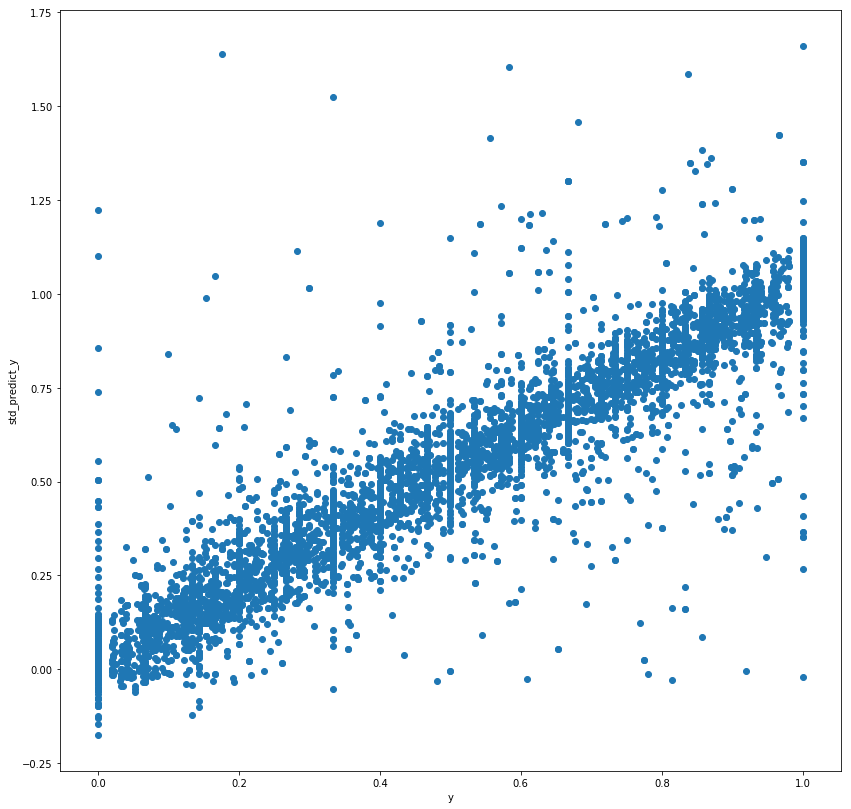

In [12]:
f, ax = plt.subplots(figsize=(14, 14))
plt.scatter(result['winPlacePerc'], result['predict'])
plt.xlabel("y")
plt.ylabel("std_predict_y")
# plt.savefig("./graph/final_5/final5_other_NN_layer3(55-55-55)_stdnorm_leaky_RELU_0.997.png")
plt.show()

In [27]:
test_id = pd.DataFrame(other_test_df['Id']) # 0.997 - 20-10-5
test_winPlacePerc = pd.DataFrame(other_test_df['winPlacePerc'])
y_predict_df = pd.DataFrame(y_predict,index = test_id.index, columns=['predict'])
diff = pd.DataFrame(other_test_df['winPlacePerc']-y_predict_df['predict'],
                   columns=['diff'])

mae = sum(abs(diff['diff']))/diff['diff'].count() # Mean absolute error

result = pd.DataFrame({'Id':test_id['Id'],'winPlacePerc':test_winPlacePerc['winPlacePerc'], 
                       'predict':y_predict_df['predict'],'diff':diff['diff'],'MAE':mae})
# result.to_csv("./result/final_5/final5_duo_NN_layer3(20-10-5)_minmax_leaky_RELU_0.997.csv", sep=',', encoding='utf-8')
print(result.head())
print('Mae\t : ', mae)

                    Id  winPlacePerc   predict      diff       MAE
645699  23cb2c91cfcb3c        0.7234  0.720498  0.002902  0.062695
356991  1a473b89294adf        0.7449  0.703962  0.040938  0.062695
3845    8ea4a4379d6605        0.5326  0.538963 -0.006363  0.062695
497102  87999364ed1788        0.8539  0.952798 -0.098898  0.062695
378651  8b4e0af47276a0        0.0833  0.213654 -0.130354  0.062695
Mae	 :  0.06269504064820101


In [28]:
test_id = pd.DataFrame(other_test_df['Id']) # 0.997 - 20-10-5
test_winPlacePerc = pd.DataFrame(other_test_df['winPlacePerc'])
y_predict_df = pd.DataFrame(y_predict,index = test_id.index, columns=['predict'])
diff = pd.DataFrame(other_test_df['winPlacePerc']-y_predict_df['predict'],
                   columns=['diff'])

mae = sum(abs(diff['diff']))/diff['diff'].count() # Mean absolute error

result = pd.DataFrame({'Id':test_id['Id'],'winPlacePerc':test_winPlacePerc['winPlacePerc'], 
                       'predict':y_predict_df['predict'],'diff':diff['diff'],'MAE':mae})
# result.to_csv("./result/final_5/final5_duo_NN_layer3(20-10-5)_minmax_leaky_RELU_0.997.csv", sep=',', encoding='utf-8')
print(result.head())
print('Mae\t : ', mae)

                    Id  winPlacePerc   predict      diff       MAE
645699  23cb2c91cfcb3c        0.7234  0.720498  0.002902  0.062695
356991  1a473b89294adf        0.7449  0.703962  0.040938  0.062695
3845    8ea4a4379d6605        0.5326  0.538963 -0.006363  0.062695
497102  87999364ed1788        0.8539  0.952798 -0.098898  0.062695
378651  8b4e0af47276a0        0.0833  0.213654 -0.130354  0.062695
Mae	 :  0.06269504064820101


In [55]:
test_id = pd.DataFrame(other_test_df['Id']) # 0.998
test_winPlacePerc = pd.DataFrame(other_test_df['winPlacePerc'])
y_predict_df = pd.DataFrame(y_predict,index = test_id.index, columns=['predict'])
diff = pd.DataFrame(other_test_df['winPlacePerc']-y_predict_df['predict'],
                   columns=['diff'])

mae = sum(abs(diff['diff']))/diff['diff'].count() # Mean absolute error

result = pd.DataFrame({'Id':test_id['Id'],'winPlacePerc':test_winPlacePerc['winPlacePerc'], 
                       'predict':y_predict_df['predict'],'diff':diff['diff'],'MAE':mae})
# result.to_csv("./result/final_5/final5_duo_NN_layer3(20-10-5)_minmax_leaky_RELU_0.99.csv", sep=',', encoding='utf-8')
print(result.head())
print('Mae\t : ', mae)

                    Id  winPlacePerc   predict      diff       MAE
828702  11a391b4431819        0.6327  0.544731  0.087969  0.075988
778542  90f89e149ddc9e        0.1277  0.254095 -0.126395  0.075988
343376  519d4b531ec4a6        0.8936  0.863049  0.030551  0.075988
735806  72fdf76e0d4b1d        0.3265  0.246198  0.080302  0.075988
498391  0650425f4ea136        0.3043  0.359242 -0.054942  0.075988
Mae	 :  0.07598796998985095


In [45]:
test_id = pd.DataFrame(other_test_df['Id']) # 0.995
test_winPlacePerc = pd.DataFrame(other_test_df['winPlacePerc'])
y_predict_df = pd.DataFrame(y_predict,index = test_id.index, columns=['predict'])
diff = pd.DataFrame(other_test_df['winPlacePerc']-y_predict_df['predict'],
                   columns=['diff'])

mae = sum(abs(diff['diff']))/diff['diff'].count() # Mean absolute error

result = pd.DataFrame({'Id':test_id['Id'],'winPlacePerc':test_winPlacePerc['winPlacePerc'], 
                       'predict':y_predict_df['predict'],'diff':diff['diff'],'MAE':mae})
# result.to_csv("./result/final_5/final5_duo_NN_layer3(20-10-5)_minmax_leaky_RELU_0.99.csv", sep=',', encoding='utf-8')
print(result.head())
print('Mae\t : ', mae)

                     Id  winPlacePerc   predict      diff       MAE
786071   fe2f37ea52c520        0.6383  0.610346  0.027954  0.067683
1240363  93ca3a4622fddc        0.8000  0.786320  0.013680  0.067683
1019970  f2aa1b4efbea51        0.6250  0.716609 -0.091609  0.067683
140032   6d0a76cb35e787        0.4565  0.455367  0.001133  0.067683
423987   35fc80e24780e8        0.6739  0.723442 -0.049542  0.067683
Mae	 :  0.06768268416502907


In [37]:
test_id = pd.DataFrame(other_test_df['Id'])
test_winPlacePerc = pd.DataFrame(other_test_df['winPlacePerc'])
y_predict_df = pd.DataFrame(y_predict,index = test_id.index, columns=['predict'])
diff = pd.DataFrame(other_test_df['winPlacePerc']-y_predict_df['predict'],
                   columns=['diff'])

mae = sum(abs(diff['diff']))/diff['diff'].count() # Mean absolute error

result = pd.DataFrame({'Id':test_id['Id'],'winPlacePerc':test_winPlacePerc['winPlacePerc'], 
                       'predict':y_predict_df['predict'],'diff':diff['diff'],'MAE':mae})
# result.to_csv("./result/final_5/final5_duo_NN_layer3(20-10-5)_minmax_leaky_RELU_0.99.csv", sep=',', encoding='utf-8')
print(result.head())
print('Mae\t : ', mae)

                     Id  winPlacePerc   predict      diff       MAE
247133   5af0d6ba2cc953        0.1875  0.204557 -0.017057  0.066976
305492   3e8cf2a1203768        0.9792  0.924067  0.055133  0.066976
1212376  1d27142d26fe8a        0.3617  0.364925 -0.003225  0.066976
677782   43e1ad7c6e96e4        0.5957  0.447099  0.148601  0.066976
1037171  accaa47ec2288b        0.3958  0.482162 -0.086362  0.066976
Mae	 :  0.06697636361866083


### kaggle 50 rank mse : 0.0207... we have to go further

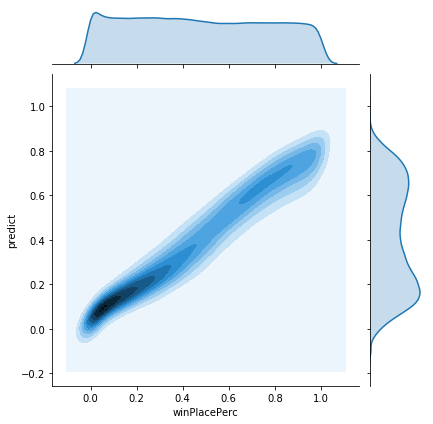

In [19]:
# 회귀분석은 1의값은 예측을 잘하지만, 가운데 값과 0의 값은 예측을 잘하지 못함
sns_plot = sns.jointplot(x= 'winPlacePerc', y= 'predict', data=result, kind='kde')
# sns_plot.savefig("./graph/final_5/final5_duo_NN_layer3(30-30-30)_kde.png")